# DEA CoastLines utility functions

## Load modules/functions


In [57]:
import matplotlib.pyplot as plt
import geopandas as gpd 
from odc.ui import select_on_a_map
from ipyleaflet import basemaps, basemap_to_tiles
from shapely.geometry import box

def rates_hist(stats_path, 
               cmap='RdBu',
               hist_log=True, 
               hist_bins=60, 
               hist_range=(-29.5, 30.5)):

    # Plot interactive map to select area
    basemap = basemap_to_tiles(basemaps.Esri.WorldImagery)
    geopolygon = select_on_a_map(height='600px',
                                 layers=(basemap,),
                                 center=(-26, 135), 
                                 zoom=4) 

    # Covert extent object to geopandas.GeoSeries object with CRS
    extent = box(*geopolygon.boundingbox)
    extent = gpd.GeoSeries(extent, crs='EPSG:4326')

    # Extract corresponding portion of stats file
    stats_subset = gpd.read_file(stats_path, bbox=extent)
    
    if hist_log:
    
        print('Plotting data with log axis after setting non-significant points to 0 m / year')
        stats_subset.loc[stats_subset.sig_time > 0.01, 'rate_time'] = 0
        
    else:
        print('Plotting data with linear axis after filtering to significant values')
        stats_subset = stats_subset.loc[stats_subset.sig_time < 0.01]

    # Select colormap
    cm = plt.cm.get_cmap(cmap)

    # Create figure
    fig = plt.figure(figsize=(10, 6))
    plt.grid(True, which="both", axis='y', color='0.9')
    plt.gca().set_axisbelow(True)

    # Plot histogram
    n, bins, patches = plt.hist(stats_subset.rate_time, 
                                bins=hist_bins, 
                                range=hist_range, 
                                log=hist_log,
                                edgecolor='black')

    # Scale values to interval [0,1]
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    # Apply colors to bars
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
        
    plt.title(f'Mean rate: {stats_subset.rate_time.mean():.2f} m / year')
    plt.xlabel('Rate of change (m / year)')
    plt.ylabel('Frequency')

    plt.show()

## Histogram analysis



Map(center=[-26, 135], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

Plotting data with log axis after setting non-significant points to 0 m / year


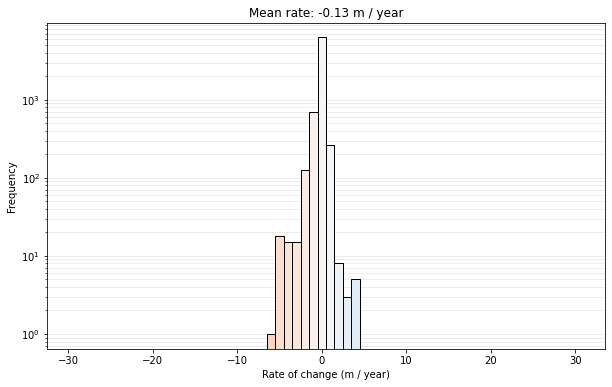

In [59]:
stats_path='/g/data/r78/rt1527/dea-notebooks/MAHTS/DEACoastLines_statistics_ntwa.shp'
# stats_path='/g/data/r78/rt1527/dea-notebooks/MAHTS/DEACoastLines_statistics_nsqqld.shp'
# stats_path='/g/data/r78/rt1527/dea-notebooks/MAHTS/DEACoastLines_statistics_tasvicsa.shp'

rates_hist(stats_path=stats_path, hist_log=True)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** March 2020